<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-2-Canny-Diffusers-HairStyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install accelerate transformers safetensors opencv-python diffusers

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=12niyI6BLrUKjvTS9_zgwTSZOop7JbGcu' -O lobe-hippie-perm_-removebg.png

In [ ]:
from diffusers import ControlNetModel, StableDiffusionXLControlNetPipeline, AutoencoderKL
from diffusers.utils import load_image
from PIL import Image
import torch
import numpy as np
import cv2

prompt = "aerial view, a futuristic research complex in a bright foggy jungle, hard lighting"

negative_prompt = 'low quality, bad quality, sketches'

# image = load_image("https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/hf-logo.png")

image = load_image("lobe-hippie-perm_-removebg.png")



controlnet_conditioning_scale = 0.5  # recommended for good generalization

controlnet = ControlNetModel.from_pretrained(
    "diffusers/controlnet-canny-sdxl-1.0",
    torch_dtype=torch.float16
)
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    controlnet=controlnet,
    vae=vae,
    torch_dtype=torch.float16,
)
pipe.enable_model_cpu_offload()

image = np.array(image)
image = cv2.Canny(image, 100, 200)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)

images = pipe(
    prompt, negative_prompt=negative_prompt, image=image, controlnet_conditioning_scale=controlnet_conditioning_scale,
    ).images

images[0].save(f"hug_lab.png")


In [7]:
import cv2
from google.colab.patches import cv2_imshow

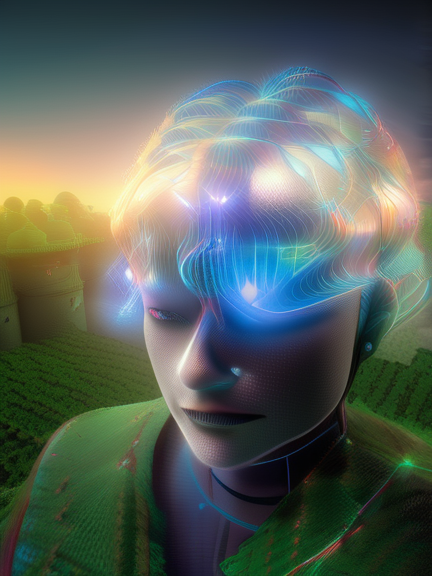

In [9]:
# Load the image using cv2.imread
image = cv2.imread("hug_lab.png")

# Now display the image
cv2_imshow(image)